In [1]:
import numpy as np
import pandas
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from scipy import ndimage
from skimage import measure

In [2]:
dataf = pandas.read_csv(r'letter-recognition-new.csv')

In [3]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   letter  805 non-null    object 
 1   xbox    805 non-null    float64
 2   ybox    805 non-null    float64
 3   width   805 non-null    int64  
 4   height  805 non-null    int64  
 5   onpix   805 non-null    int64  
 6   xbar    805 non-null    float64
 7   ybar    805 non-null    float64
 8   x2bar   805 non-null    float64
 9   y2bar   805 non-null    float64
 10  xybar   805 non-null    float64
 11  x2ybar  805 non-null    float64
 12  xy2bar  805 non-null    float64
 13  xedge   805 non-null    float64
 14  xedgey  805 non-null    int64  
 15  yedge   805 non-null    float64
 16  yedgex  805 non-null    int64  
dtypes: float64(11), int64(5), object(1)
memory usage: 107.0+ KB


In [4]:
dataf.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,20.791925,21.986957,22.455901,28.525466,266.142857,-0.031173,-0.010304,48.921015,81.368966,-2.704950,-30.692972,-32.081588,2.274850,1127.662112,1.270350,771.177640
std,2.084472,0.724580,5.926759,2.909653,102.602616,0.078021,0.055750,25.637707,21.528964,9.714792,134.380551,106.997538,1.199046,407.503606,0.431285,299.668788
min,12.000000,19.000000,2.000000,23.000000,69.000000,-0.280000,-0.193548,0.652174,35.968121,-44.070312,-579.053363,-386.151316,1.074074,564.000000,0.090909,36.000000
25%,19.500000,21.500000,19.000000,26.000000,193.000000,-0.073900,-0.026923,30.954545,66.603125,-9.017241,-81.243842,-88.357771,1.791667,783.000000,0.923077,550.000000
50%,21.000000,22.000000,23.000000,28.000000,251.000000,-0.009000,-0.001776,44.418067,78.635321,0.000000,0.000000,-10.224390,2.090909,1098.000000,1.285714,747.000000
75%,22.500000,22.500000,26.000000,30.000000,320.000000,0.004123,0.011186,65.015038,92.597826,2.058719,26.947075,14.089844,2.476190,1292.000000,1.571429,996.000000
max,27.000000,24.500000,41.000000,41.000000,758.000000,0.311494,0.201299,133.152256,164.317308,24.776675,466.047249,355.161137,17.000000,3158.000000,2.300000,1547.000000


In [5]:
y = dataf.pop('letter')

In [6]:
def norm(df):
    norm_df = df.copy()
    columns_to_normalize = df.columns

    for column in columns_to_normalize:
        min_val = norm_df[column].min()
        max_val = norm_df[column].max()
    
        norm_df[column] = (norm_df[column] - min_val) / (max_val - min_val)
    return norm_df

In [7]:
dataf_norm = norm(dataf)

<function matplotlib.pyplot.show(close=None, block=None)>

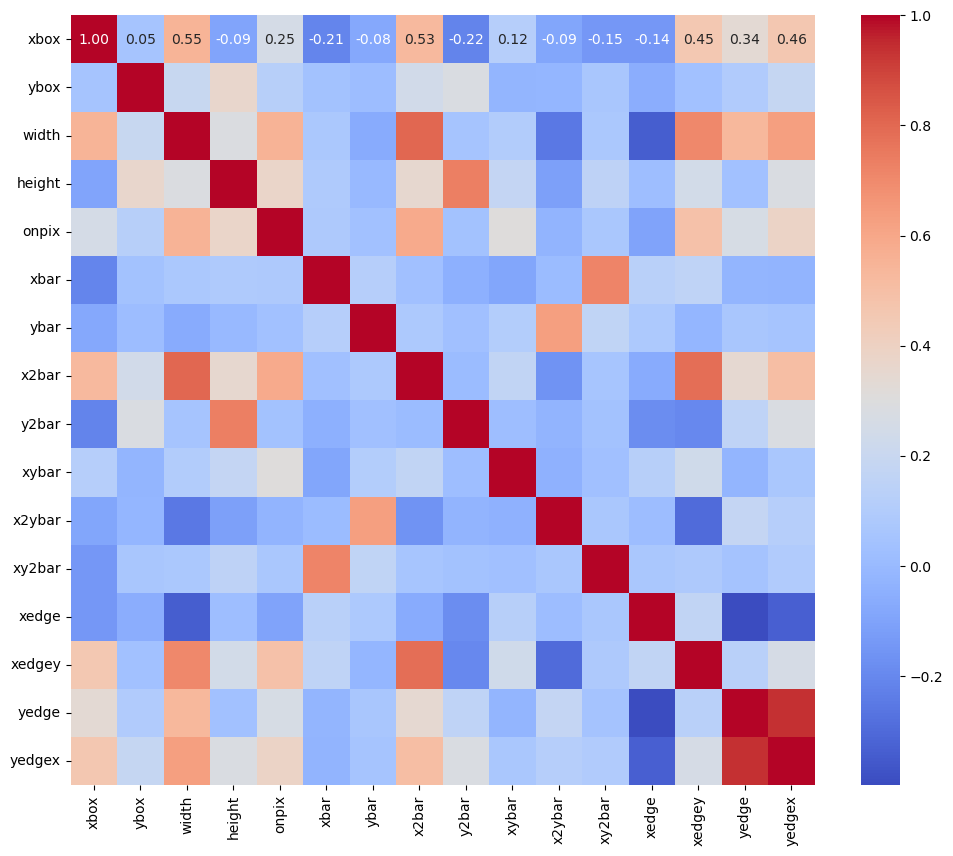

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(dataf_norm.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show

In [9]:
x_train,x_test,y_train,y_test=train_test_split(dataf_norm,y,test_size=0.2)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
#looking for optimal k
best_k = 1
for k in range(2, 21):
    test_knn = KNeighborsClassifier(k)
    best_knn = KNeighborsClassifier(best_k)
    
    test_knn.fit(x_train, y_train)
    best_knn.fit(x_train, y_train)
    
    if test_knn.score(x_test, y_test) > best_knn.score(x_test, y_test):
        best_k = k
        
print(best_k)

14


In [11]:
results = []

for i in range(1,21):
    knnTest = KNeighborsClassifier(i)
    knnTest.fit(x_train, y_train)
    result = knnTest.score(x_test, y_test)
    results.append(result)

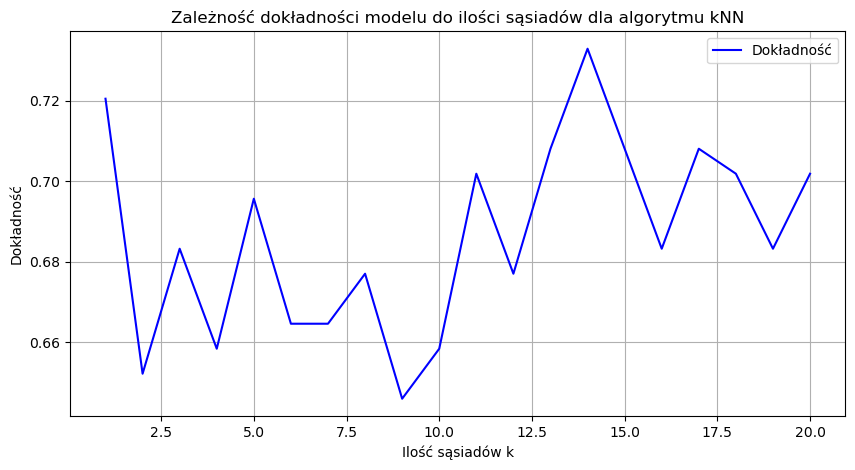

In [12]:
arguments = [i for i in range(1,21)]
plt.figure(figsize=(10, 5))
plt.plot(arguments, results, label = 'Dokładność', color = 'blue')
plt.title('Zależność dokładności modelu do ilości sąsiadów dla algorytmu kNN')
plt.xlabel('Ilość sąsiadów k')
plt.ylabel('Dokładność')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier


knn_lib=KNeighborsClassifier(best_k)
knn_lib.fit(x_train, y_train)
knn_lib.score(x_test, y_test)

0.7329192546583851

In [14]:
args = []
accs = []
for i in range(100):
    args.append(i)
    xt, xte, yt, yte = train_test_split(dataf_norm,y,test_size=0.2)
    knn = KNeighborsClassifier(6)
    knn.fit(xt, yt)
    accs.append(knn.score(xte, yte))

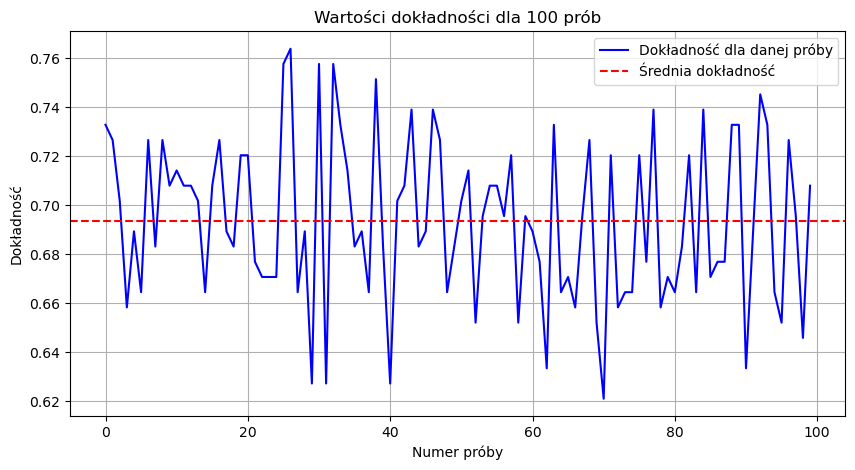

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(args, accs, label = 'Dokładność dla danej próby', color = 'blue')
plt.axhline(np.mean(accs), label = "Średnia dokładność", color = 'red', linestyle = 'dashed')
plt.title('Wartości dokładności dla 100 prób')
plt.xlabel('Numer próby')
plt.ylabel('Dokładność')
plt.legend()
plt.grid(True)
plt.show()